<a href="https://colab.research.google.com/github/JamilePolycarpo/MachineLearning/blob/main/Exercicios_Regressao_Linear_Multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [2]:
!pip install gdown

In [3]:
!mkdir -p data/
!gdown https://drive.google.com/uc?id=1zcsUU6neakc2_BnATvvsLekvMyz1cztM -O data/
!gdown https://drive.google.com/uc?id=1zZdavmX2Zlhfe9up-25rXvE3v0HF9Ajd -O data/

Downloading...
From: https://drive.google.com/uc?id=1zcsUU6neakc2_BnATvvsLekvMyz1cztM
To: /content/data/Advertising.csv
100% 4.55k/4.55k [00:00<00:00, 10.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zZdavmX2Zlhfe9up-25rXvE3v0HF9Ajd
To: /content/data/Portland_housePrices.csv
100% 679/679 [00:00<00:00, 2.18MB/s]


## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [4]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [5]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
```

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [6]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [7]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

# Regressão Linear Multivariada
A classe <i>LinearRegression</i> já está implementada de modo a funcionar com múltiplos atributos preditores.

Também é possível utilizar o método de <i>Descida de Gradiente</i> através da classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>:
    


In [8]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização (a ser explicado nas próximas aulas)
reg_grad.fit(X,y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

Text(0, 0.5, 'Preço')

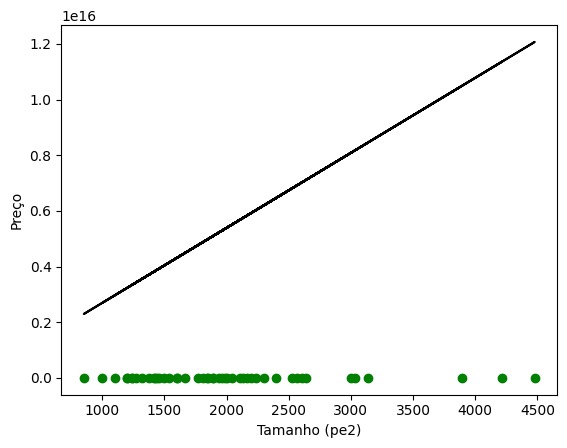

In [9]:
from matplotlib import pyplot as plt
plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

<b>Entretanto</b>... o algoritmo não aprende quando os dados são usados diretamente.

<b>Por quê?</b>

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente <i>depois de normalizar os dados de entrada</i>.

## Exercício 1

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


In [11]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('data/Advertising.csv', index_col=0)
X = data.loc[:,['TV']]
y = data.loc[:,['Sales']]

#funcao para treinar o modelo multiplas vezes
def treina_modelo(X,y):
  lr_model = []
  sgd_model = []
  for i in range(10):
    lr = LinearRegression().fit(X,y)
    lr_model.append(lr)
    sgd = SGDRegressor(max_iter=5000,alpha=0).fit(X,y)
    sgd_model.append(sgd)

  return lr_model, sgd_model

print('Coeficiente de RL:', lr_model)
print('Coeficiente com SGD: ', sgd_model)



KeyError: "None of [Index(['Sales'], dtype='object')] are in the [columns]"

In [18]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
X = data.loc[:,['tamanho']]
# Use 'data' instead of y to reference the correct DataFrame
y = data.loc[:,['preco']]

#funcao para treinar o modelo multiplas vezes
def treina_modelo(X,y):
  lr_model = []
  sgd_model = []
  for i in range(10):
    lr = LinearRegression().fit(X,y)
    lr_model.append(lr)
    sgd = SGDRegressor(max_iter=5000,alpha=0).fit(X,y)
    sgd_model.append(sgd)

  return lr_model, sgd_model

lr_model, sgd_model = treina_modelo(X, y)

print('Coeficientes de RL:')
for model in lr_model:
    print(model.coef_)

print('\nCoeficientes com SGD:')
for model in sgd_model:
    print(model.coef_)

Coeficientes de RL:
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]
[[134.52528772]]

Coeficientes com SGD:
[1.03316575e+11]
[-1.63976521e+12]
[6.89428693e+11]
[-2.09139843e+12]
[1.5412668e+12]
[-1.06307737e+12]
[-9.08096043e+11]
[2.38072551e+12]
[-1.65761526e+11]
[-3.02147378e+12]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

1- para regresao linear o modelo não muda o aprendizado, ele se mantem o mesmo, já no SDGRegressor existe variacao



## Exercício 2


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


In [22]:

import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

In [24]:
data = pd.read_csv('data/Portland_housePrices.csv')

x = data[['tamanho', 'quartos']]
y = data['preco']

reg = LinearRegression().fit(x,y)
y_pred_rl = reg.predict(x)
time_linear = time.time()
print(time_linear)

rss_linear = mean_squared_error(y, y_pred_rl)
print(rss_linear)
r2 = reg.score(x,y)
print(r2)

reg_sgd = SGDRegressor(max_iter=5000,alpha=0).fit(x,y)
y_pred_sgd = reg_sgd.predict(x)
time_sgd = time.time()
print(time_sgd)

rss_reg_sgd = mean_squared_error(y, y_pred_sgd)
print(rss_reg_sgd)
r2_sgd = reg_sgd.score(x,y)
print(r2_sgd)

print('Regressao Linear: RSS', rss_linear, 'R2', r2, 'Tempo de treino', time_linear)
print('Regressao SGD: RSS', rss_reg_sgd, 'R2', r2_sgd, 'Tempo de treino, ', time_sgd)


1719350143.2791233
4086560101.2056575
0.7329450180289142
1719350143.297651
3.9782201429445726e+31
-2.599750113151725e+21
Regressao Linear: RSS 4086560101.2056575 R2 0.7329450180289142 Tempo de treino 1719350143.2791233
Regressao SGD: RSS 3.9782201429445726e+31 R2 -2.599750113151725e+21 Tempo de treino,  1719350143.297651


1- sim é possivel obter um modelo melhor
2- as duas variaveis parecem ser importantes
3- o tempo de SGD é ligeiramente mais rapido

# Exercício 3

Realizar a análise da qualidade dos preditores utilizados no modelo construído.

1) Construir o plot de resíduos. Será que os resíduos estão aleatoriamente distribuídos ao redor de 0?

2) Calcular os valores p para os preditores utilizados no modelo de regressão. Utilize [esse link](https://stackoverflow.com/a/42677750) como referência. Utilizar essa técnica para selecionar variáveis preditivas. Comparar o desempenho do modelo construído a partir de variáveis preditivas com melhores valores p com um modelo que contêm todas as variáveis.




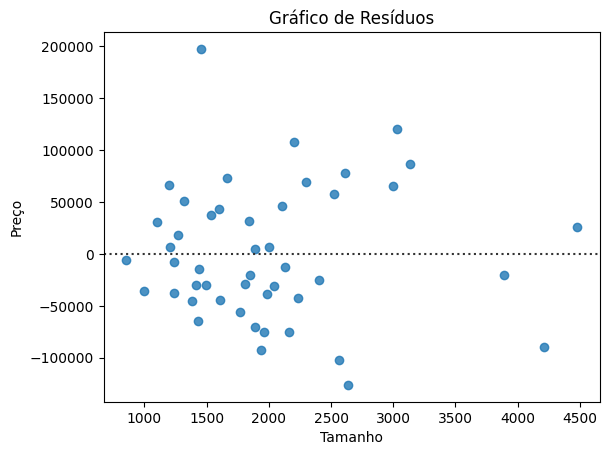

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot de residuos House Pricing

sns.residplot(x='tamanho', y='preco', data=data)
plt.title("Gráfico de Resíduos")
plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.show()

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           2.43e-13
Time:                        21:28:17   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.96e+04   4.18e+04      2.145      0.0

1- Sim está distribuido ao redor do 0
2- A analise mostra que a variavel tamanho tem relaçao com preco


# Exercício 4

Realizar o teste para descobrir multicolinearidade entre variáveis preditivas;

1) Utilizando [esse link](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) fazer o cáclulo do fator de inflação da variância (*Variance Inflation Factor - VIF*). Existe alguma evidência de multicolinearidade entre as variáveis preditivas?

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,10.861138,tamanho
1,10.861138,quartos
